# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
np.random.seed(5289457)

# Przydatne funkcje 

In [111]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=0.5, color='green')
    vis.show()

In [112]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [113]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

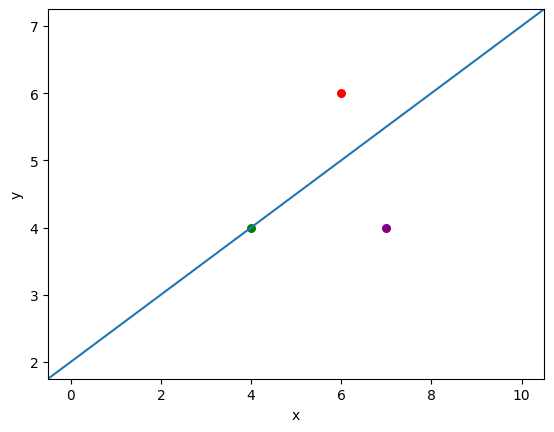

In [114]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [64]:
import numpy as np

def generate_uniform_points(left, right, n=10**5):
    """
    Funkcja generuje równomiernie n punktów na kwadratowym obszarze od left do right
    (jednakowo na osi x i y) o współrzędnych rzeczywistych.
    
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: lista punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    x = np.random.uniform(left, right, n)
    y = np.random.uniform(left, right, n)
    return list(zip(x, y))


<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [65]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

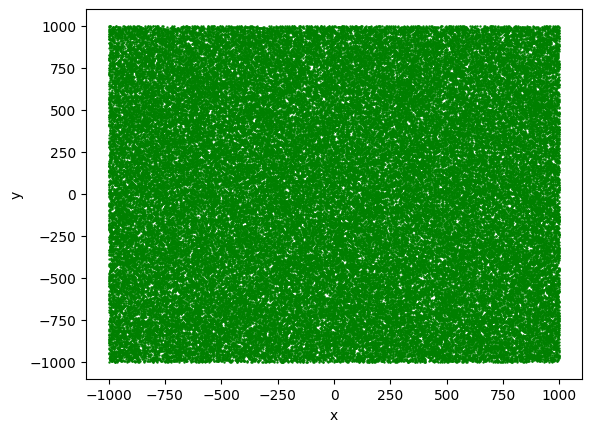

In [66]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [67]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

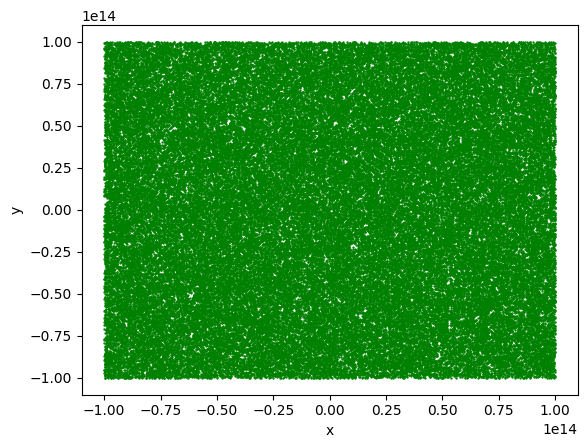

In [68]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [69]:
import numpy as np

def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka (x0, y0) – środek okręgu
    :param R: promień okręgu 
    :param n: liczba punktów
    :return: lista krotek [(x1, y1), (x2, y2), ..., (xn, yn)]
    """
    x0, y0 = O
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)  # n równych kątów
    x = x0 + R * np.cos(angles)
    y = y0 + R * np.sin(angles)
    return list(zip(x, y))


<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [70]:
points_c = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

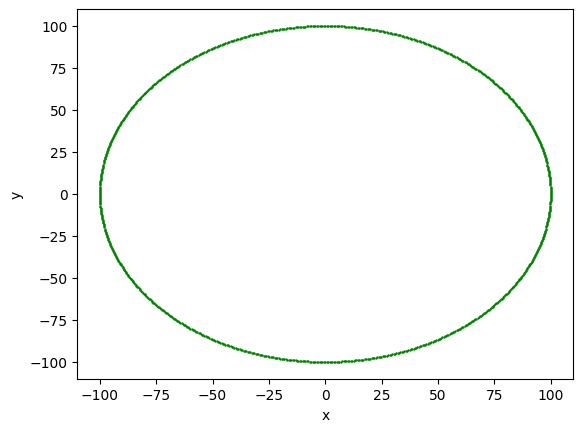

In [71]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [72]:
import numpy as np

def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b.
    :param a: krotka współrzędnych (x1, y1)
    :param b: krotka współrzędnych (x2, y2)
    :param n: ilość generowanych punktów
    :return: lista punktów [(x1, y1), (x2, y2), ..., (xn, yn)]
    """
    ax, ay = a
    bx, by = b
    t = np.linspace(0, 1, n)  # równomierne wartości parametru t
    x = ax + t * (bx - ax)  # mozna 
    y = ay + t * (by - ay)
    return list(zip(x, y))


<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [73]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1), 1000)

Zwizualizuj wygenerowane punkty.

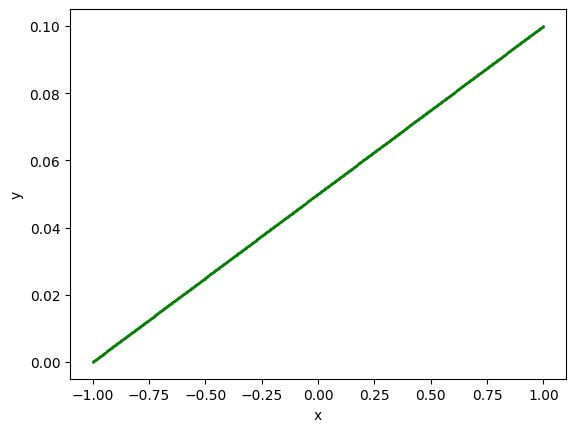

In [74]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [75]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.139s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [123]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 metodą Sarrusa dla punktów 2D.
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) drugiego punktu
    :param c: krotka współrzędnych (x, y) trzeciego punktu
    :return: wartość wyznacznika macierzy (float)
    """
    x1, y1 = a
    x2, y2 = b
    x3, y3 = c

    # Obliczamy wyznacznik metodą Sarrusa
    det = (x1*y2*1 + x2*y3*1 + x3*y1*1
           - x3*y2*1 - x2*y1*1 - x1*y3*1)
    return det


Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [77]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych (numpy)
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) drugiego punktu
    :param c: krotka współrzędnych (x, y) trzeciego punktu
    :return: wartość wyznacznika macierzy (float)
    """
    mat = np.array([
        [a[0], a[1], 1],
        [b[0], b[1], 1],
        [c[0], c[1], 1]
    ])
    return np.linalg.det(mat)

Uzupełnij funkcje ```mat_det_2x2```

In [78]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) drugiego punktu
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika (float)
    """
    ax, ay = a
    bx, by = b
    cx, cy = c

    return (ax - cx) * (by - cy) - (ay - cy) * (bx - cx)


Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [79]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych (numpy)
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) drugiego punktu
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy (float)
    """
    mat = np.array([
        [a[0] - c[0], a[1] - c[1]],
        [b[0] - c[0], b[1] - c[1]]
    ])
    return np.linalg.det(mat)

Przetestujmy napisane powyżej funkcje.

In [80]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [81]:
def categorize_points(points, a, b, mat_det_func, eps = 1e-14):
    """
    Klasyfikuje punkty względem prostej wyznaczonej przez punkty a i b z użyciem podanej funkcji wyznacznika.
    
    :param points: lista punktów [(x1, y1), (x2, y2), ...]
    :param a: punkt startowy prostej (x, y)
    :param b: punkt końcowy prostej (x, y)
    :param mat_det_func: funkcja do obliczenia wyznacznika (np. mat_det_2x2 lub mat_det_2x2_lib)
    :param eps: epsilon do uznania punktu za leżący na prostej
    :return: krotka 3 list: (LEFT, ON_LINE, RIGHT)
    """
    left_points = []
    on_line_points = []
    right_points = []

    for p in points:
        det = mat_det_func(a, b, p)
        if det > eps:
            left_points.append(p)
        elif det < -eps:
            right_points.append(p)
        else:
            on_line_points.append(p)

    return left_points, on_line_points, right_points


In [82]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [83]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

In [84]:
print(len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

50207 0 49793


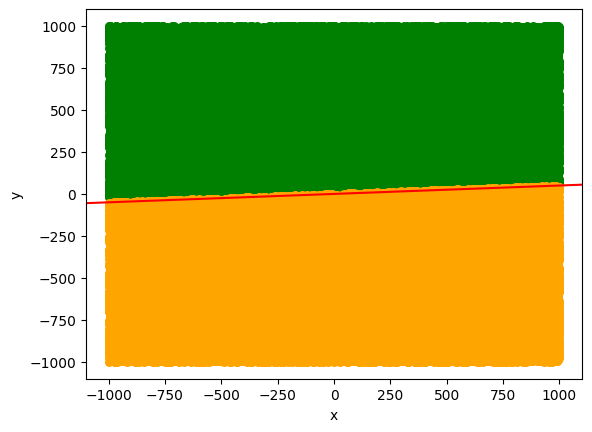

In [85]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [86]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)

In [87]:
print(len(classified_points_b_left), len(classified_points_b_mid), len(classified_points_b_right))

50028 0 49972


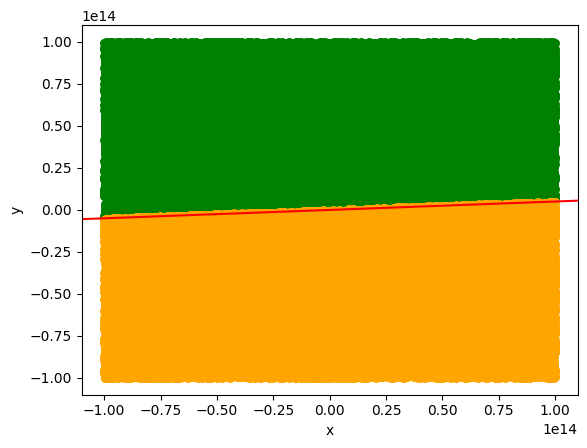

In [88]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [89]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -12)

In [90]:
print(len(classified_points_c_left), len(classified_points_c_mid), len(classified_points_c_right))

499 0 501


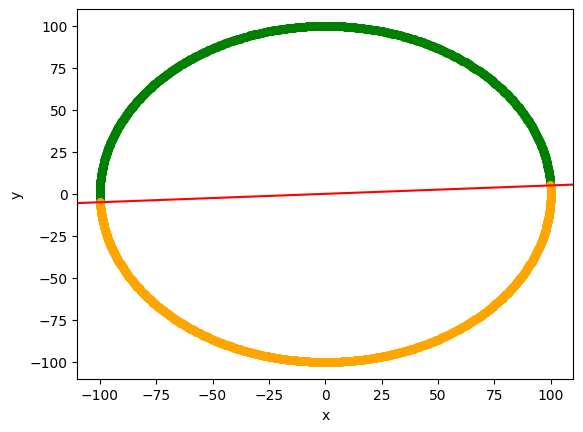

In [91]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [92]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 0)

In [93]:
print(len(classified_points_d_left), len(classified_points_d_mid), len(classified_points_d_right))

345 305 350


In [94]:
classified_points_d_left_3,classified_points_d_mid_3,classified_points_d_right_3 = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -12)

In [95]:
print(len(classified_points_d_left_3), len(classified_points_d_mid_3), len(classified_points_d_right_3))

0 1000 0


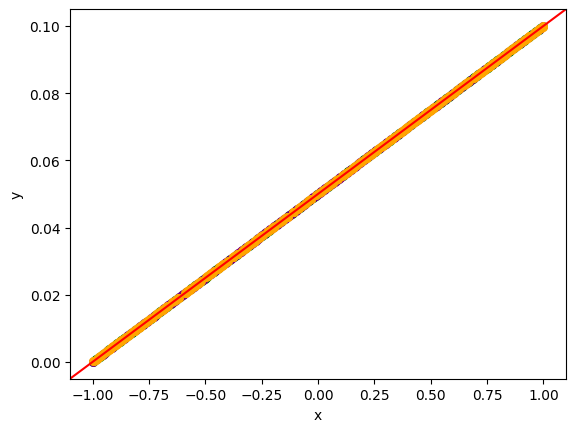

In [96]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [97]:
points_a_float32 = np.float32(points_a)

In [98]:
points_b_float32 = np.float32(points_b)

In [99]:
points_c_float32 = np.float32(points_c)

In [100]:
points_d_float32 = np.float32(points_d)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [101]:
def classify_points(points, a, b, eps, dtype=np.float64, use='det2'):
    pts = points.astype(dtype)
    a_ = np.array(a, dtype=dtype); b_ = np.array(b, dtype=dtype)
    dets = np.empty(len(pts), dtype=dtype)
    for i,p in enumerate(pts):
        if use == 'det2':
            dets[i] = det2x2(a_, b_, p)
        else:
            dets[i] = det3x3(a_, b_, p)
    left = np.sum(dets > eps)
    right = np.sum(dets < -eps)
    col = np.sum(np.abs(dets) <= eps)
    return dets, left, right, col

In [46]:
epsilons = [1e-14, 1e-12, 1e-9, 1e-6, 0]

In [47]:
dets = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]

In [117]:
results = []

for eps in epsilons:
    for mat_det in dets:
        left, mid, right = categorize_points(points_d, a, b, mat_det, eps)
        results.append({
            "Metoda": mat_det.__name__,
            "Epsilon": eps,
            "Float": "float64",
            "lewo": len(left),
            "na_lini": len(mid),
            "prawo": len(right)
        })

df_results = pd.DataFrame(results)
print(df_results)


             Metoda       Epsilon    Float  lewo  na_lini  prawo
0       mat_det_2x2  1.000000e-14  float64     0     1000      0
1   mat_det_2x2_lib  1.000000e-14  float64     0     1000      0
2       mat_det_3x3  1.000000e-14  float64     0     1000      0
3   mat_det_3x3_lib  1.000000e-14  float64     0     1000      0
4       mat_det_2x2  1.000000e-12  float64     0     1000      0
5   mat_det_2x2_lib  1.000000e-12  float64     0     1000      0
6       mat_det_3x3  1.000000e-12  float64     0     1000      0
7   mat_det_3x3_lib  1.000000e-12  float64     0     1000      0
8       mat_det_2x2  1.000000e-09  float64     0     1000      0
9   mat_det_2x2_lib  1.000000e-09  float64     0     1000      0
10      mat_det_3x3  1.000000e-09  float64     0     1000      0
11  mat_det_3x3_lib  1.000000e-09  float64     0     1000      0
12      mat_det_2x2  1.000000e-06  float64     0     1000      0
13  mat_det_2x2_lib  1.000000e-06  float64     0     1000      0
14      mat_det_3x3  1.00

In [118]:
results = []

for eps in epsilons:
    for mat_det in dets:
        left, mid, right = categorize_points(points_d_float32, a, b, mat_det, eps)
        results.append({
            "Metoda": mat_det.__name__,
            "Epsilon": eps,
            "Float": "float32",
            "lewo": len(left),
            "na_lini": len(mid),
            "prawo": len(right)
        })

df_results = pd.DataFrame(results)
print(df_results)


             Metoda       Epsilon    Float  lewo  na_lini  prawo
0       mat_det_2x2  1.000000e-14  float32   241      281    478
1   mat_det_2x2_lib  1.000000e-14  float32   372        2    626
2       mat_det_3x3  1.000000e-14  float32   186      395    419
3   mat_det_3x3_lib  1.000000e-14  float32   424      156    420
4       mat_det_2x2  1.000000e-12  float32   241      281    478
5   mat_det_2x2_lib  1.000000e-12  float32   372        2    626
6       mat_det_3x3  1.000000e-12  float32   186      395    419
7   mat_det_3x3_lib  1.000000e-12  float32   424      156    420
8       mat_det_2x2  1.000000e-09  float32   222      307    471
9   mat_det_2x2_lib  1.000000e-09  float32   261      206    533
10      mat_det_3x3  1.000000e-09  float32   167      433    400
11  mat_det_3x3_lib  1.000000e-09  float32   366      270    364
12      mat_det_2x2  1.000000e-06  float32     0     1000      0
13  mat_det_2x2_lib  1.000000e-06  float32     0     1000      0
14      mat_det_3x3  1.00

In [116]:
results = []

for eps in epsilons:
    for mat_det in dets:
        left, mid, right = categorize_points(points_d_float32, a, b, mat_det, eps)
        results.append({
            "Metoda": mat_det.__name__,
            "Epsilon": eps,
            "Float": "float32",
            "lewo": len(left),
            "na_lini": len(mid),
            "prawo": len(right)
        })

df_results = pd.DataFrame(results)
print(df_results)


             Metoda       Epsilon    Float  lewo  na_lini  prawo
0       mat_det_2x2  1.000000e-14  float32   241      281    478
1   mat_det_2x2_lib  1.000000e-14  float32   372        2    626
2       mat_det_3x3  1.000000e-14  float32   186      395    419
3   mat_det_3x3_lib  1.000000e-14  float32   424      156    420
4       mat_det_2x2  1.000000e-12  float32   241      281    478
5   mat_det_2x2_lib  1.000000e-12  float32   372        2    626
6       mat_det_3x3  1.000000e-12  float32   186      395    419
7   mat_det_3x3_lib  1.000000e-12  float32   424      156    420
8       mat_det_2x2  1.000000e-09  float32   222      307    471
9   mat_det_2x2_lib  1.000000e-09  float32   261      206    533
10      mat_det_3x3  1.000000e-09  float32   167      433    400
11  mat_det_3x3_lib  1.000000e-09  float32   366      270    364
12      mat_det_2x2  1.000000e-06  float32     0     1000      0
13  mat_det_2x2_lib  1.000000e-06  float32     0     1000      0
14      mat_det_3x3  1.00

In [53]:
import matplotlib.pyplot as plt

def run_and_draw(points, a, b, epsilons, dets):
    """
    Dla każdej kombinacji epsilon i metody wyznaczania wyznacznika (mat_det)
    klasyfikuje punkty i rysuje wykres z pomocą draw_line().
    """
    for eps in epsilons:
        for mat_det in dets:
            # Klasyfikacja punktów
            left, mid, right = categorize_points(points, a, b, mat_det, eps)
            
            # Rysowanie
            plt.figure(figsize=(6, 6))
            draw_line(left, mid, right)
            plt.title(f"Metoda: {mat_det.__name__}, ε = {eps}")
            plt.show()


<Figure size 600x600 with 0 Axes>

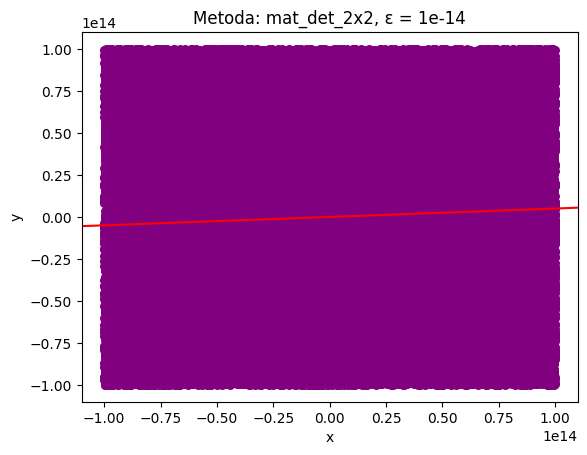

<Figure size 600x600 with 0 Axes>

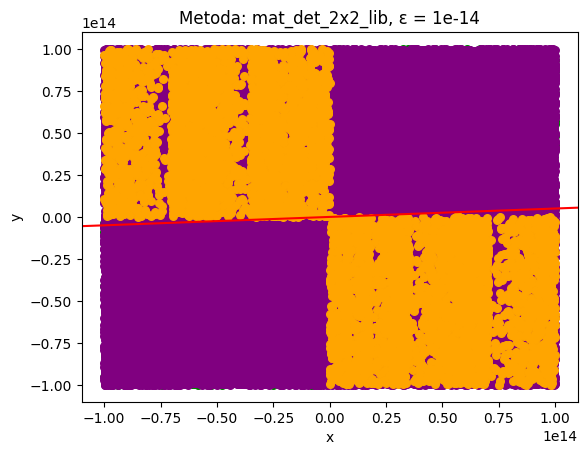

<Figure size 600x600 with 0 Axes>

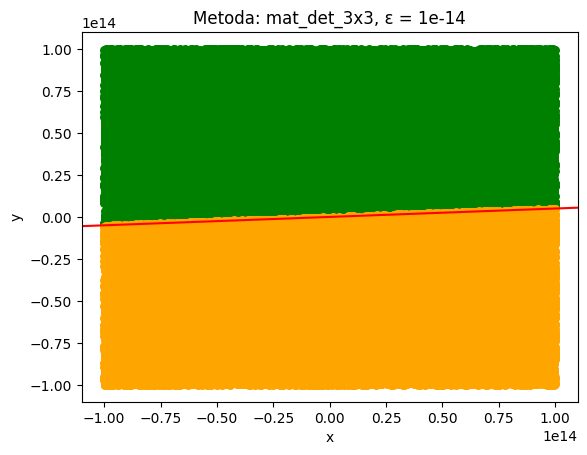

<Figure size 600x600 with 0 Axes>

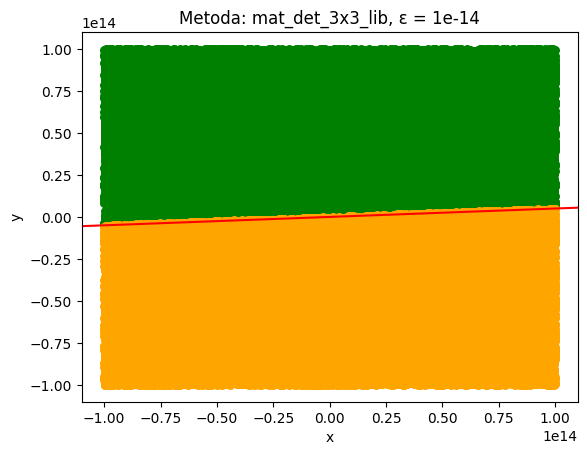

<Figure size 600x600 with 0 Axes>

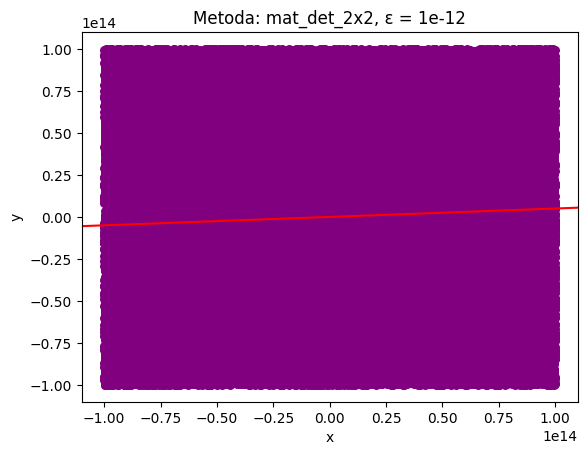

<Figure size 600x600 with 0 Axes>

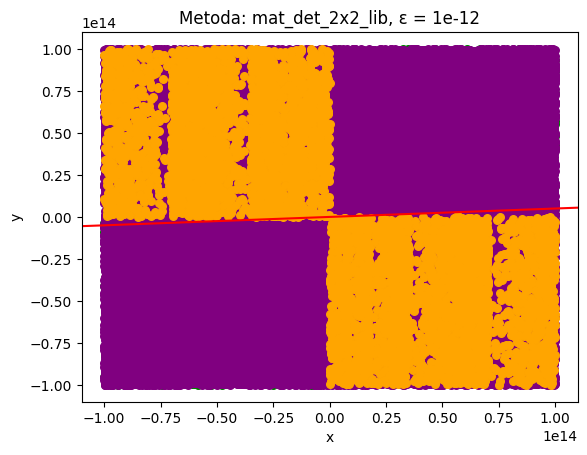

<Figure size 600x600 with 0 Axes>

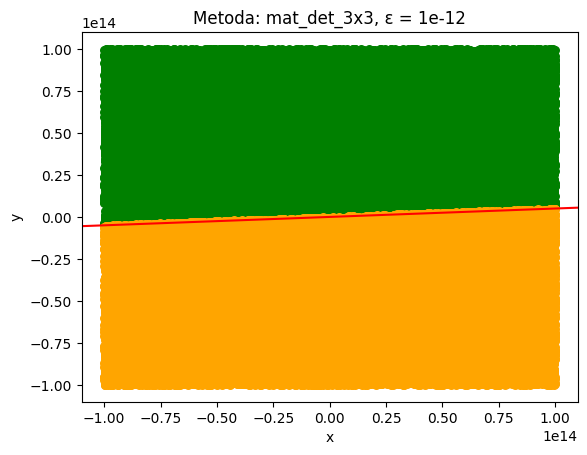

<Figure size 600x600 with 0 Axes>

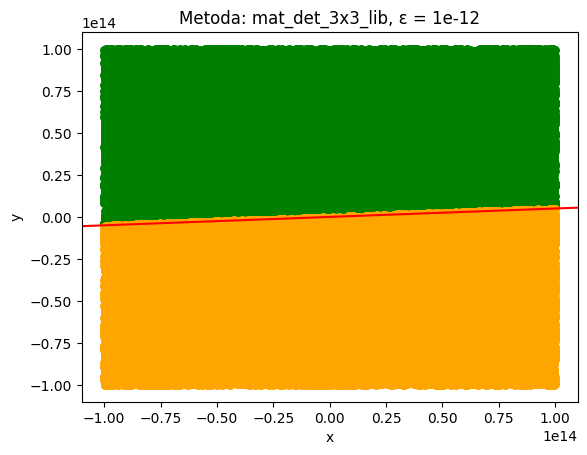

<Figure size 600x600 with 0 Axes>

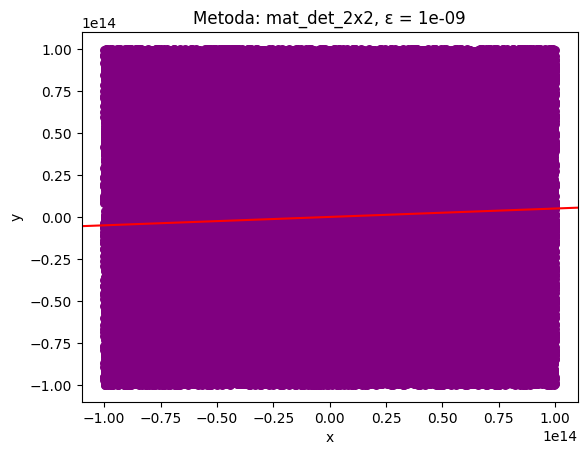

<Figure size 600x600 with 0 Axes>

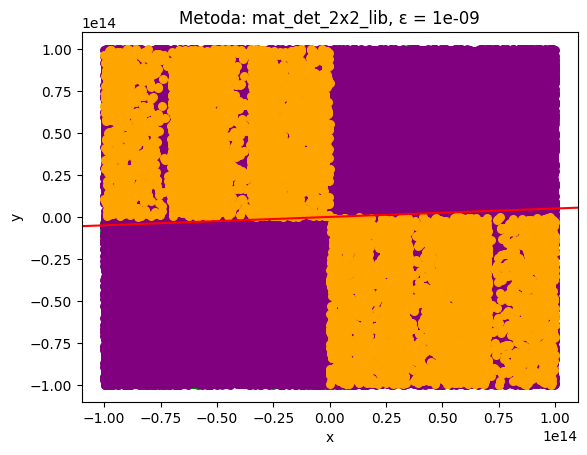

<Figure size 600x600 with 0 Axes>

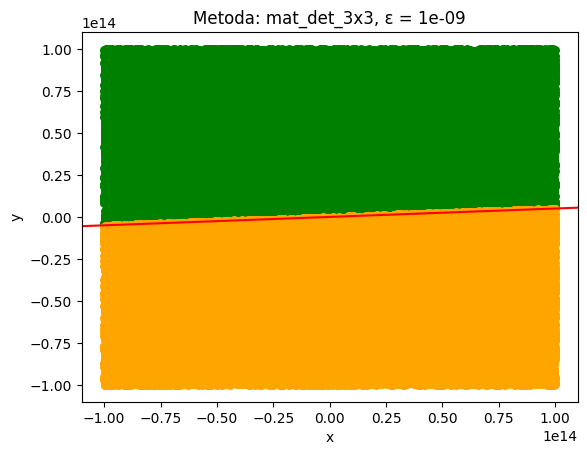

<Figure size 600x600 with 0 Axes>

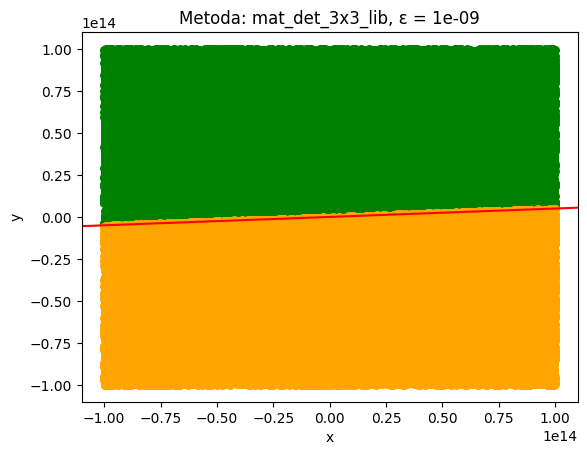

<Figure size 600x600 with 0 Axes>

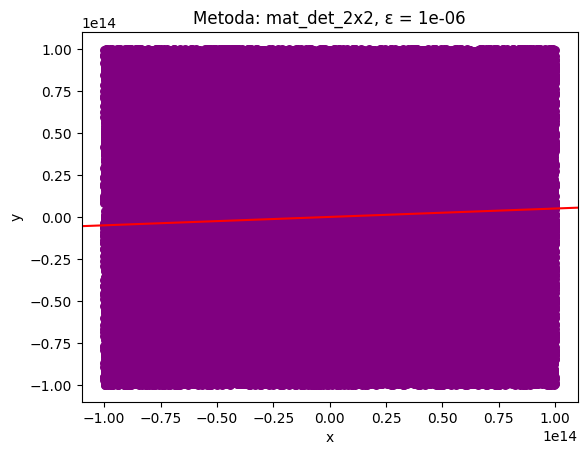

<Figure size 600x600 with 0 Axes>

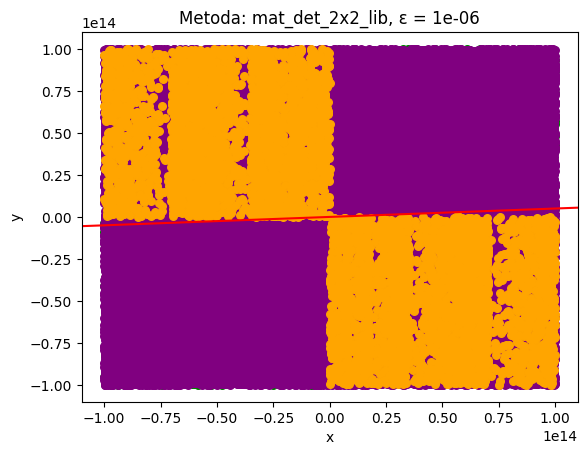

<Figure size 600x600 with 0 Axes>

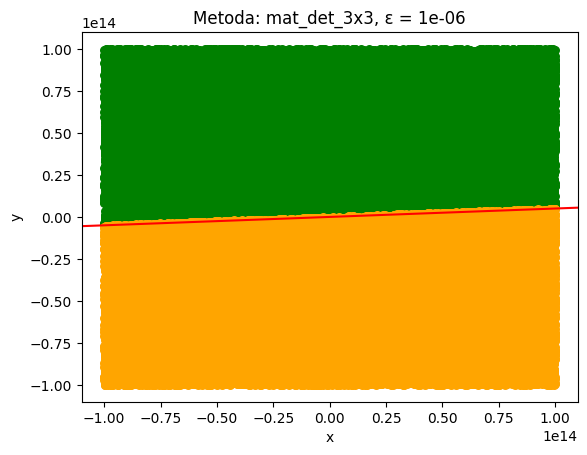

<Figure size 600x600 with 0 Axes>

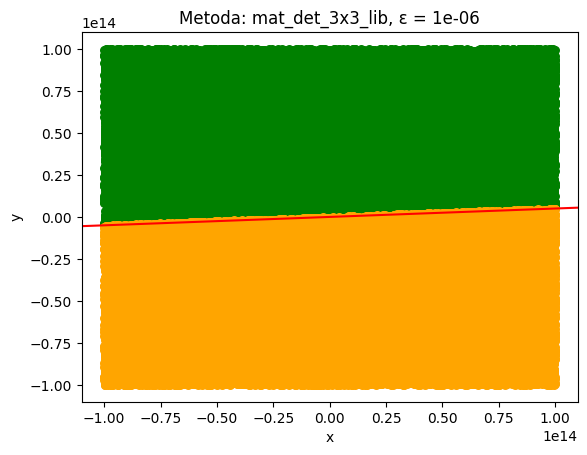

<Figure size 600x600 with 0 Axes>

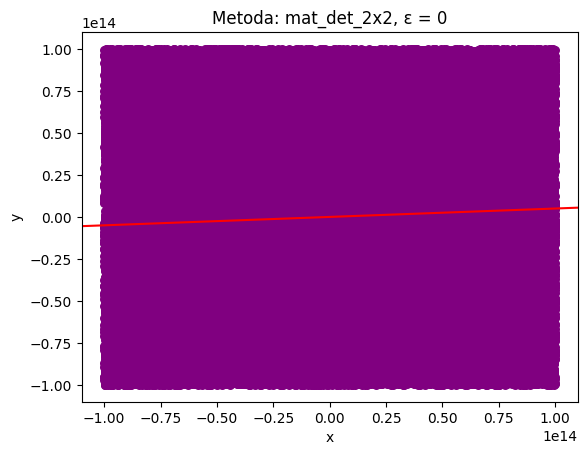

<Figure size 600x600 with 0 Axes>

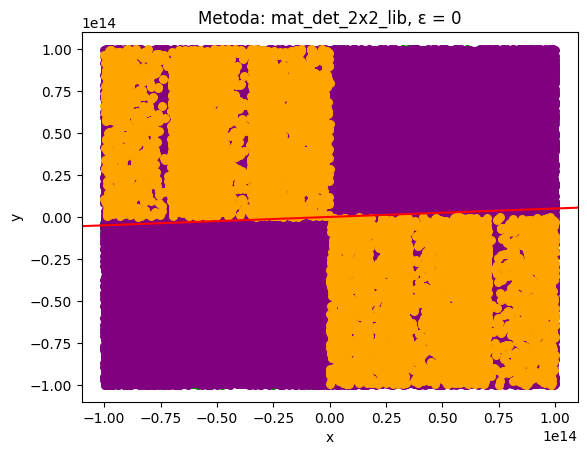

<Figure size 600x600 with 0 Axes>

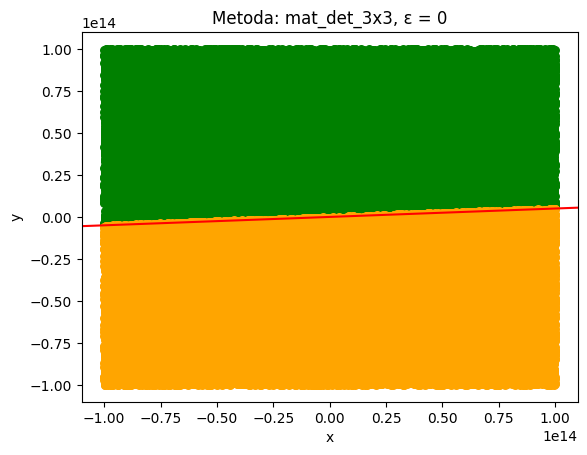

<Figure size 600x600 with 0 Axes>

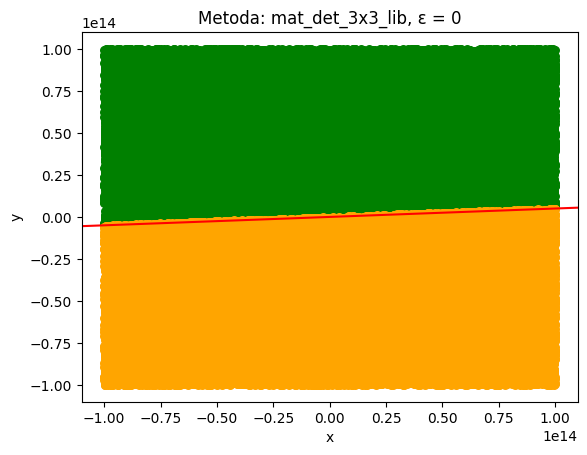

In [121]:
run_and_draw(points_b_float32, a, b, epsilons, dets)


<Figure size 600x600 with 0 Axes>

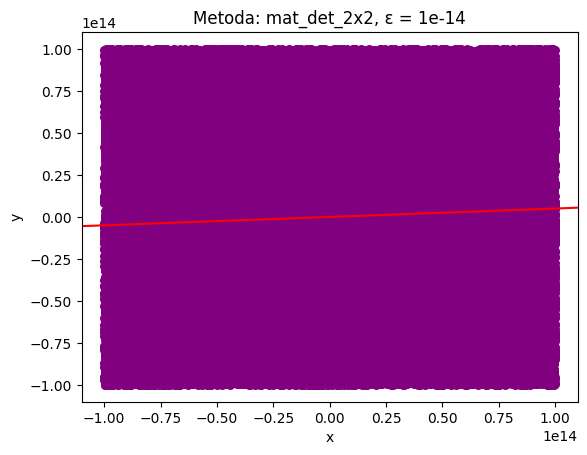

<Figure size 600x600 with 0 Axes>

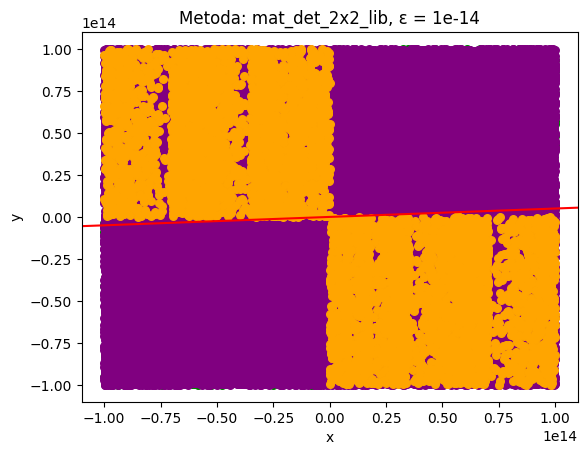

<Figure size 600x600 with 0 Axes>

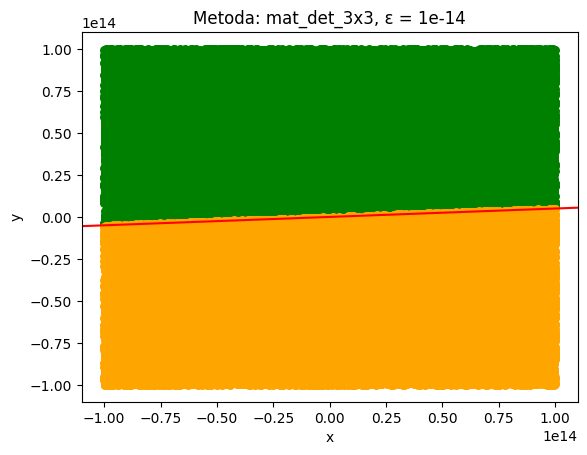

<Figure size 600x600 with 0 Axes>

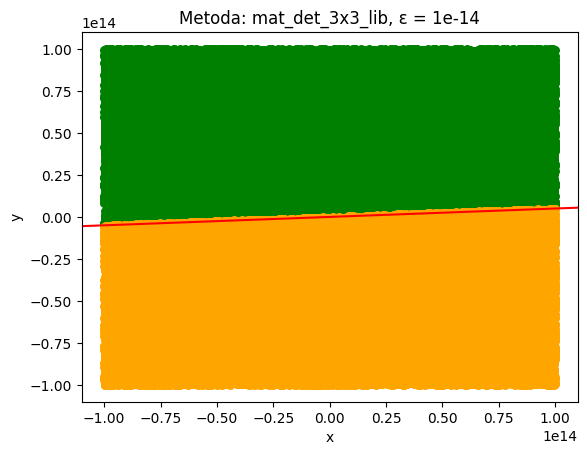

<Figure size 600x600 with 0 Axes>

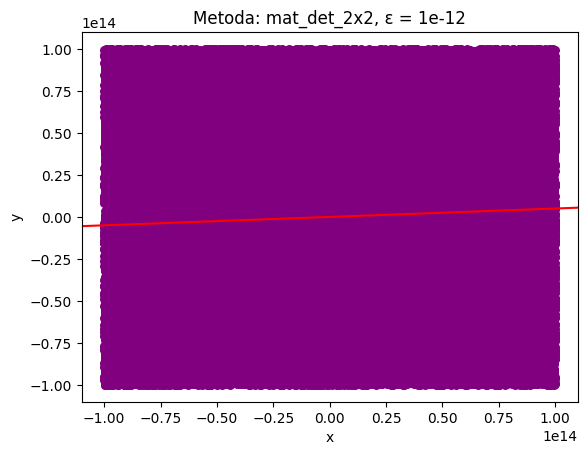

<Figure size 600x600 with 0 Axes>

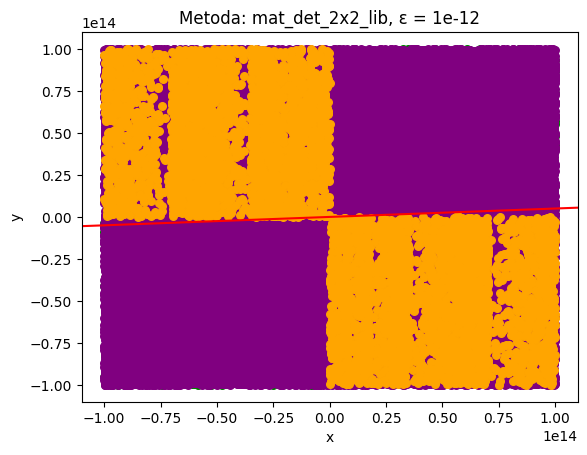

<Figure size 600x600 with 0 Axes>

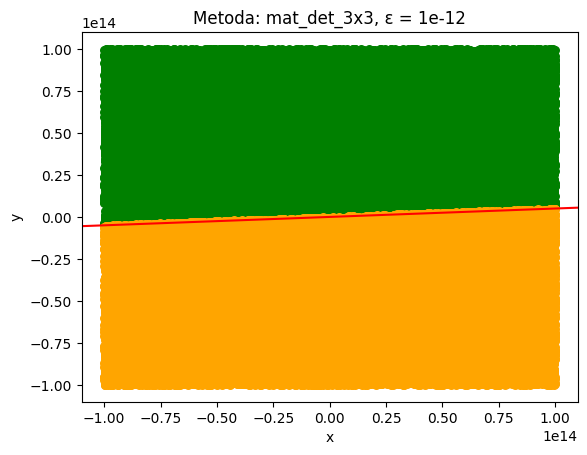

<Figure size 600x600 with 0 Axes>

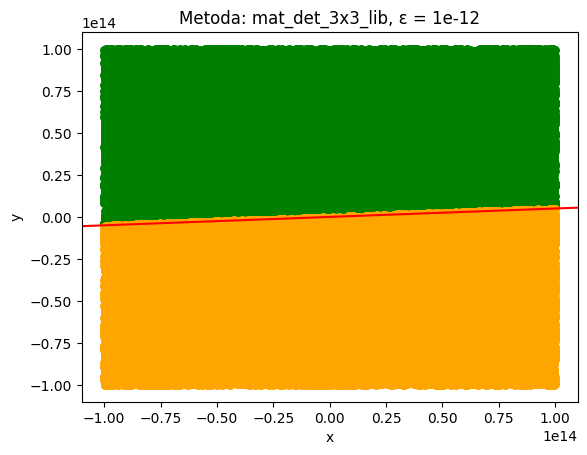

<Figure size 600x600 with 0 Axes>

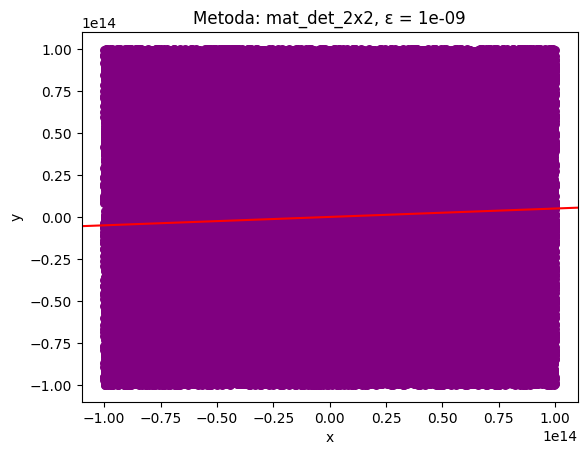

<Figure size 600x600 with 0 Axes>

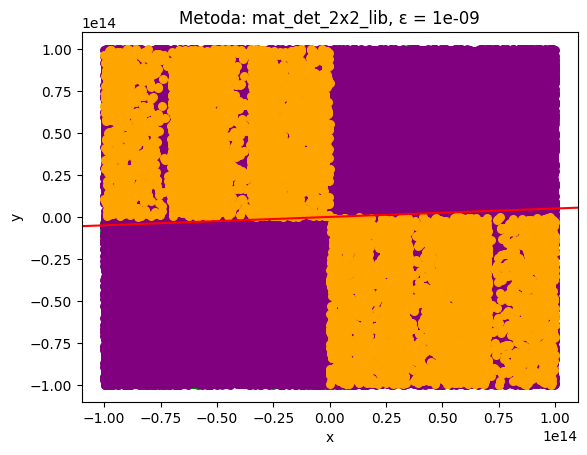

<Figure size 600x600 with 0 Axes>

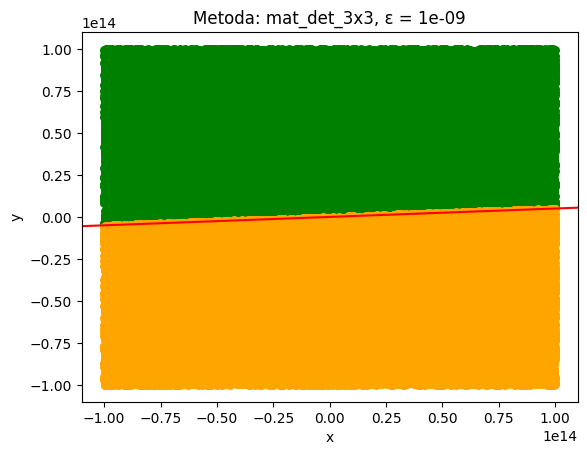

<Figure size 600x600 with 0 Axes>

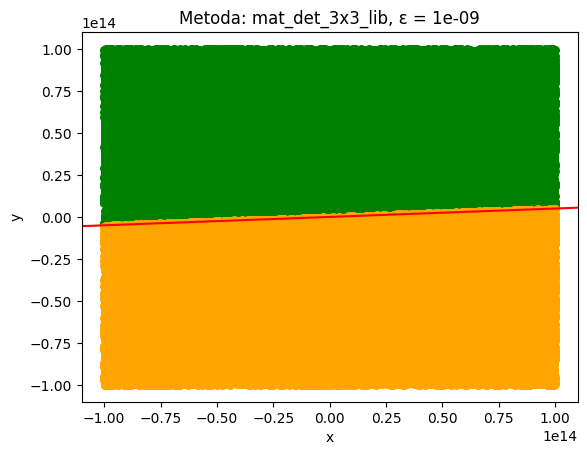

<Figure size 600x600 with 0 Axes>

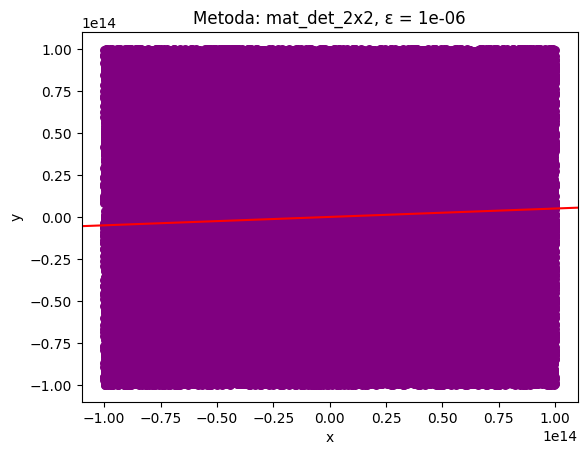

<Figure size 600x600 with 0 Axes>

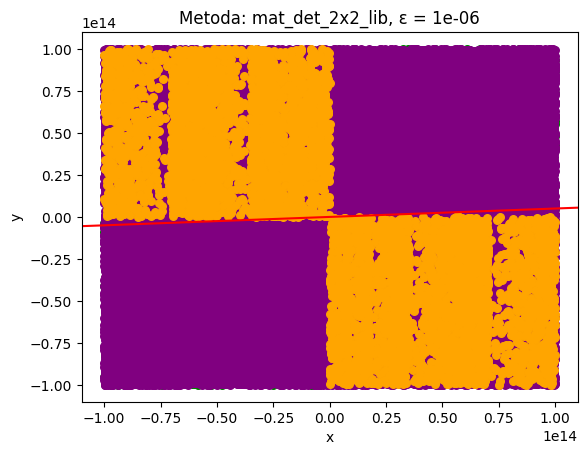

<Figure size 600x600 with 0 Axes>

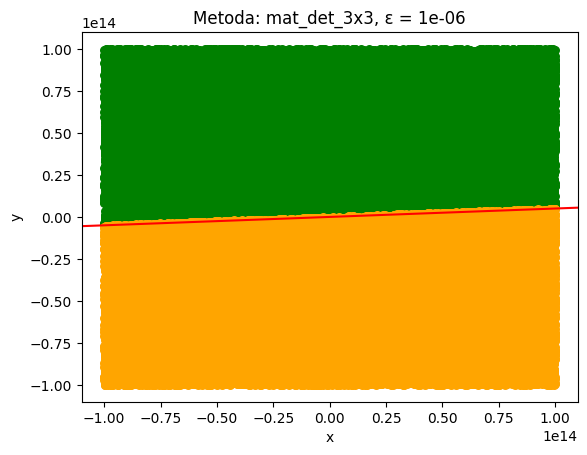

<Figure size 600x600 with 0 Axes>

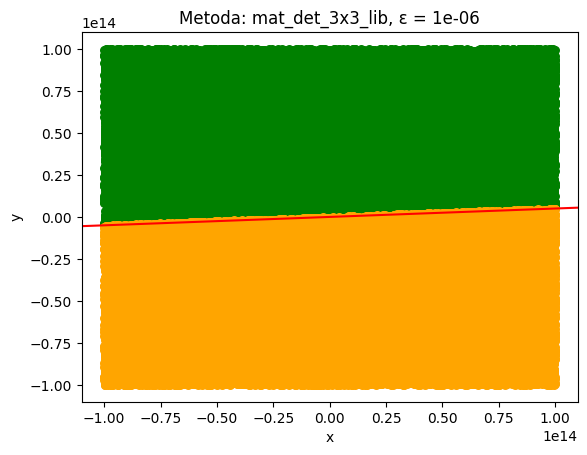

<Figure size 600x600 with 0 Axes>

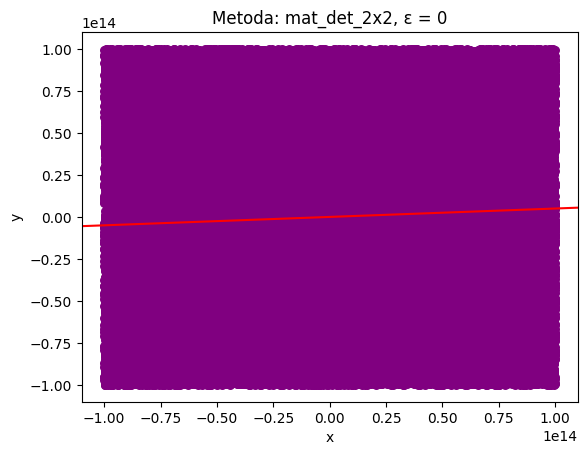

<Figure size 600x600 with 0 Axes>

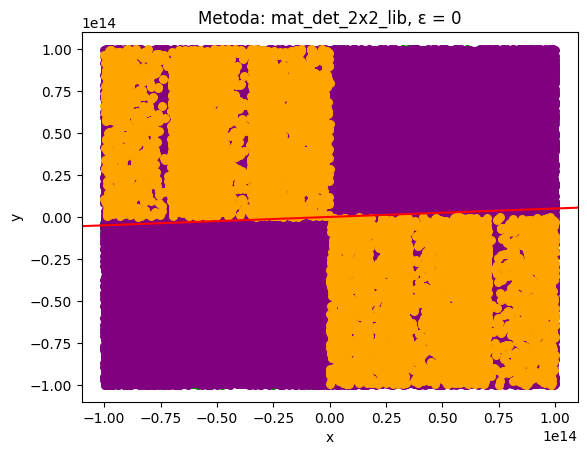

<Figure size 600x600 with 0 Axes>

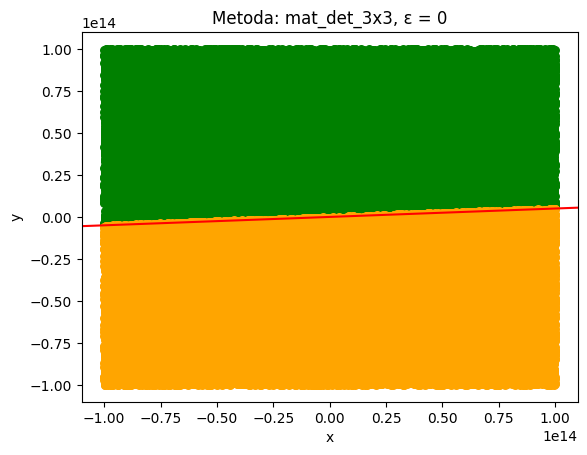

<Figure size 600x600 with 0 Axes>

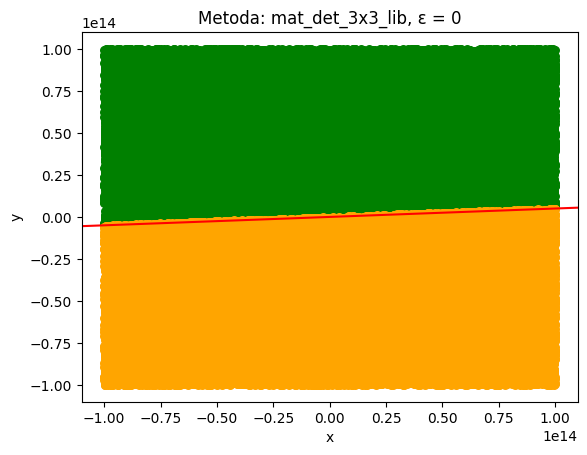

In [122]:
run_and_draw(points_b_float32, a, b, epsilons, dets)


In [104]:
def print_points_on_line(points, a, b, det_methods, epsilons):
    """
    Wypisuje współrzędne punktów, które leżą na prostej ab, dla zadanych metod wyznacznika i epsilonów.
    """
    for mat_det in [mat_det_2x2, mat_det_2x2_lib]:
        print(f"\nMetoda: {mat_det.__name__}")
        for eps in epsilons:
            _, mid, _ = categorize_points(points, a, b, mat_det, eps)
            
            print(f"\nEpsilon = {eps}")
            print("Na linii:")
            for p in mid:
                print(p)


In [105]:
print_points_on_line(points_b, a, b, [mat_det_2x2, mat_det_2x2_lib], epsilons)



Metoda: mat_det_2x2

Epsilon = 1e-14
Na linii:
(np.float64(-92808447832351.56), np.float64(-4638961148760.672))
(np.float64(-98864619056286.16), np.float64(-4909449065178.672))
(np.float64(58906427054712.25), np.float64(2943935264015.4688))
(np.float64(-86286438458100.44), np.float64(-4296925450899.4062))
(np.float64(-80149683760744.58), np.float64(-4032111314248.6562))
(np.float64(-75061230702931.42), np.float64(-3763403346938.2812))
(np.float64(-47018957292283.914), np.float64(-2360617191785.9688))
(np.float64(-50977113945005.305), np.float64(-2551653380912.3906))

Epsilon = 1e-12
Na linii:
(np.float64(-92808447832351.56), np.float64(-4638961148760.672))
(np.float64(-98864619056286.16), np.float64(-4909449065178.672))
(np.float64(58906427054712.25), np.float64(2943935264015.4688))
(np.float64(-86286438458100.44), np.float64(-4296925450899.4062))
(np.float64(-80149683760744.58), np.float64(-4032111314248.6562))
(np.float64(-75061230702931.42), np.float64(-3763403346938.2812))
(np.flo

<Figure size 600x600 with 0 Axes>

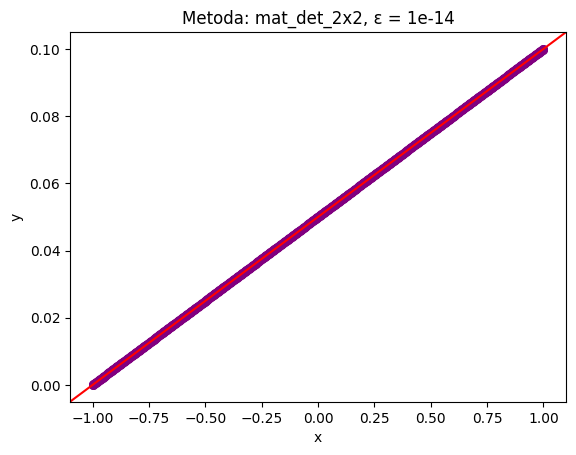

<Figure size 600x600 with 0 Axes>

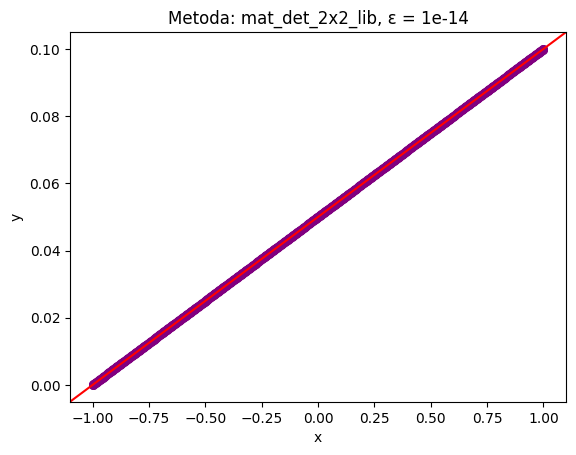

<Figure size 600x600 with 0 Axes>

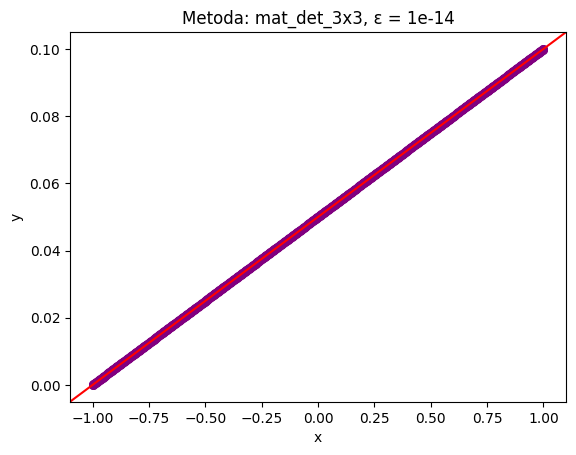

<Figure size 600x600 with 0 Axes>

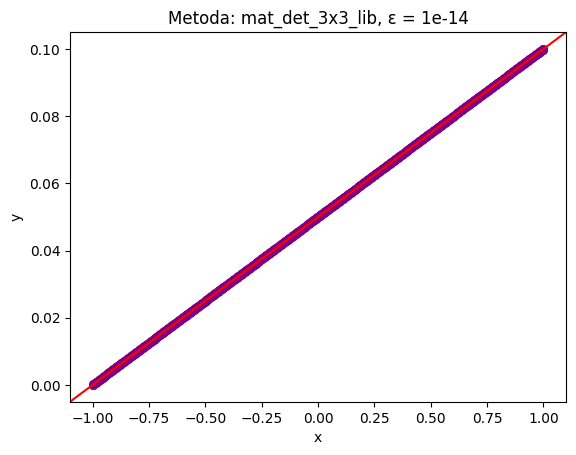

<Figure size 600x600 with 0 Axes>

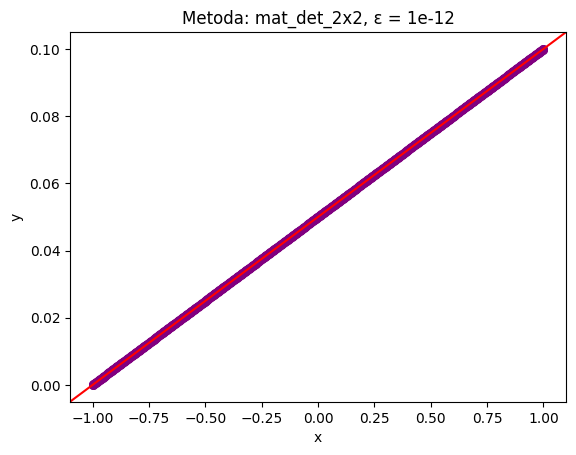

<Figure size 600x600 with 0 Axes>

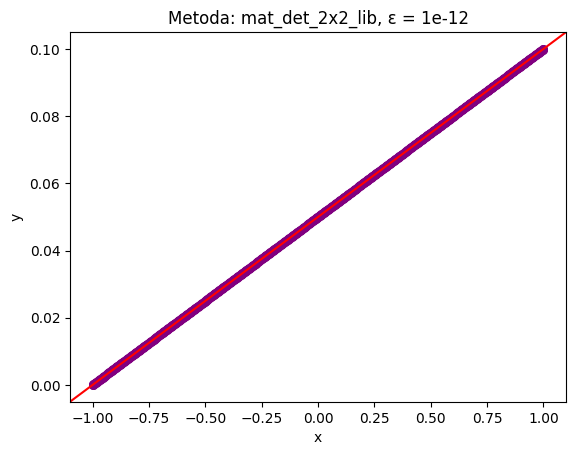

<Figure size 600x600 with 0 Axes>

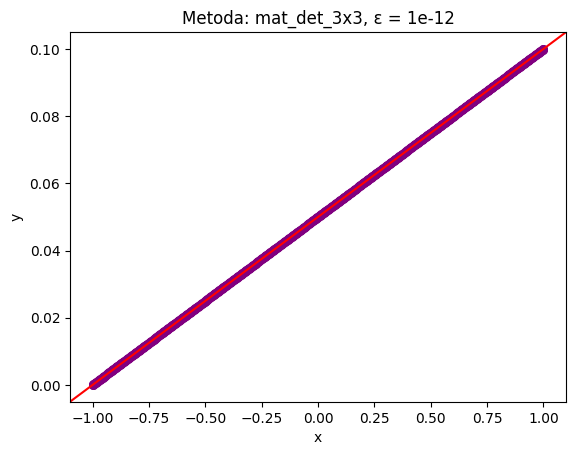

<Figure size 600x600 with 0 Axes>

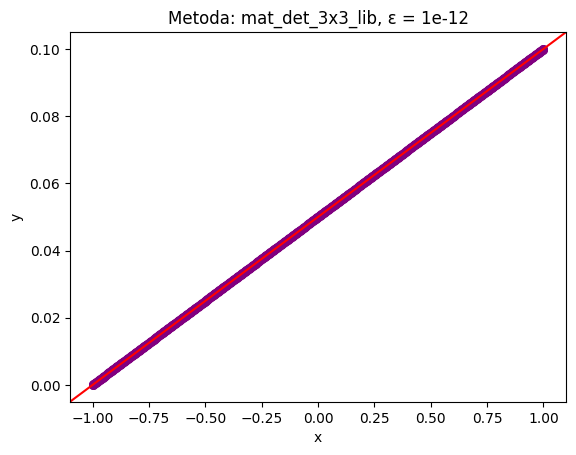

<Figure size 600x600 with 0 Axes>

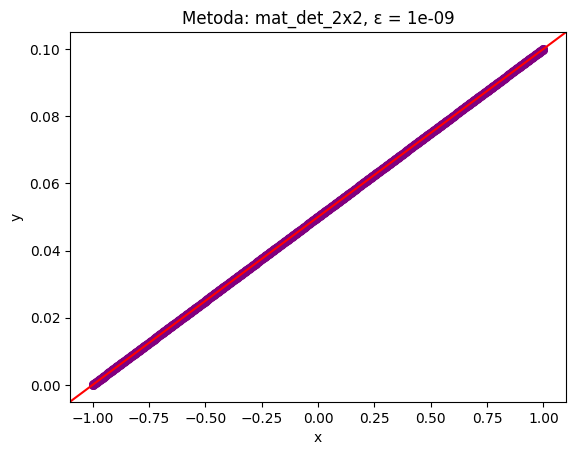

<Figure size 600x600 with 0 Axes>

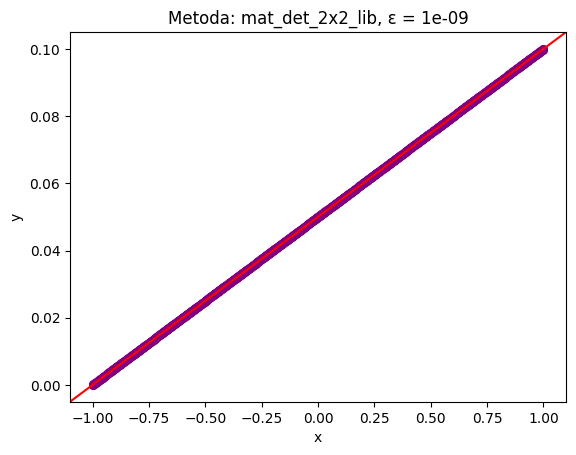

<Figure size 600x600 with 0 Axes>

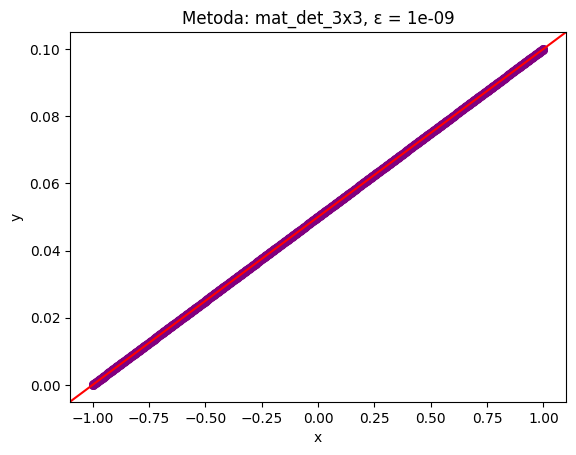

<Figure size 600x600 with 0 Axes>

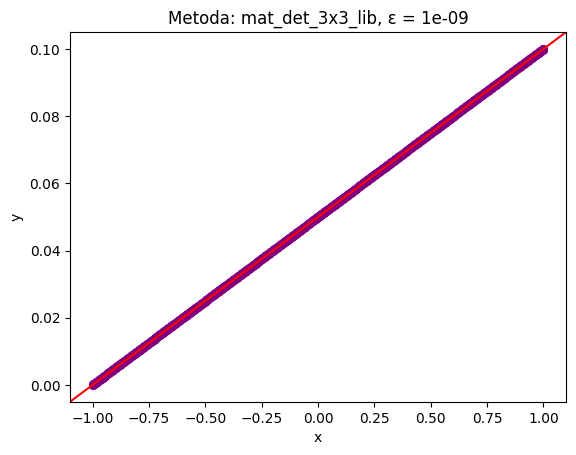

<Figure size 600x600 with 0 Axes>

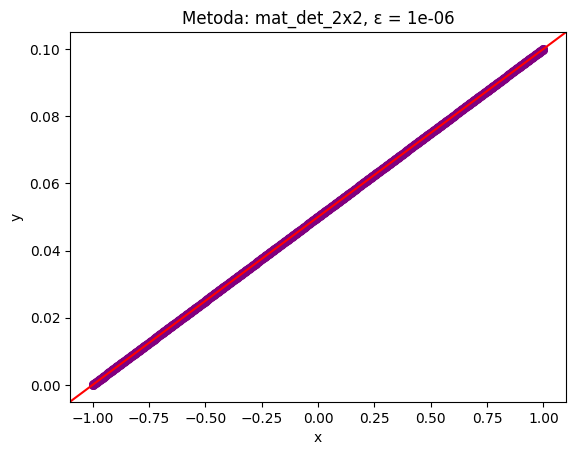

<Figure size 600x600 with 0 Axes>

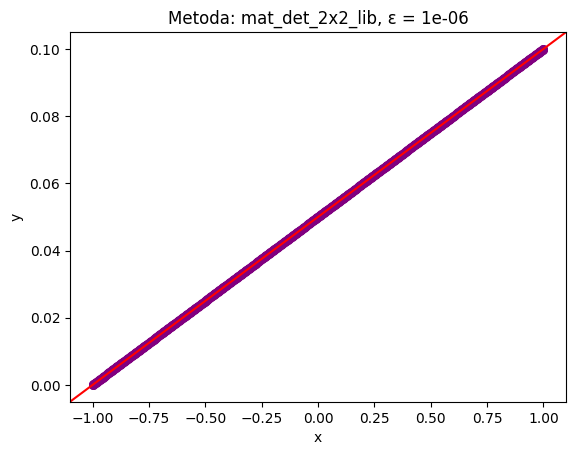

<Figure size 600x600 with 0 Axes>

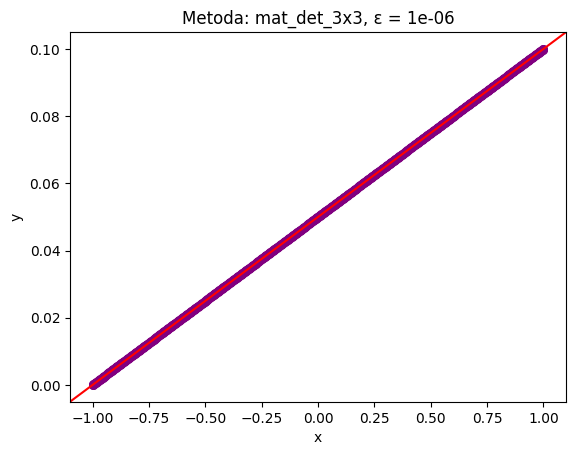

<Figure size 600x600 with 0 Axes>

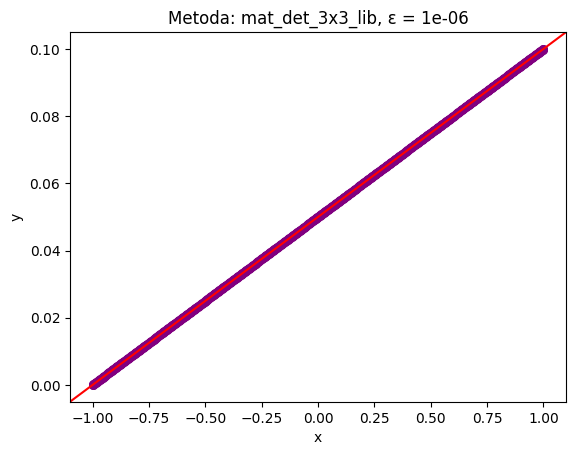

<Figure size 600x600 with 0 Axes>

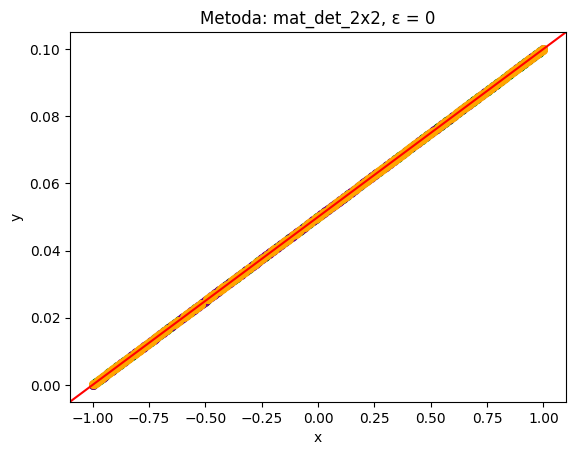

<Figure size 600x600 with 0 Axes>

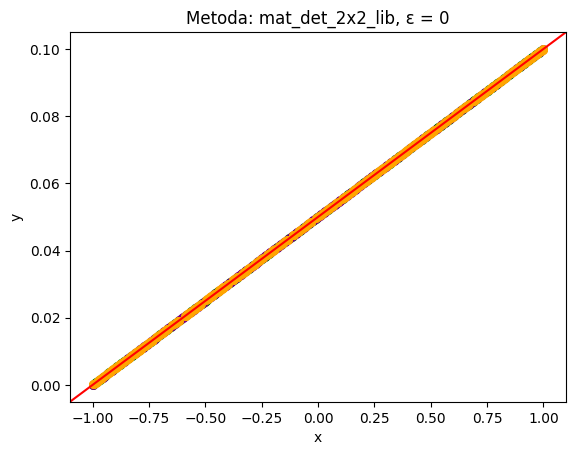

<Figure size 600x600 with 0 Axes>

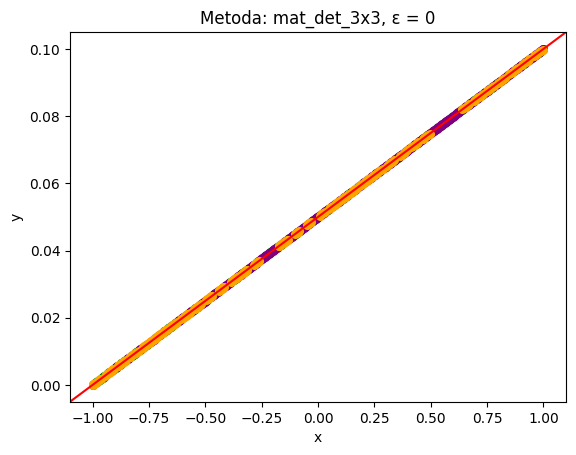

<Figure size 600x600 with 0 Axes>

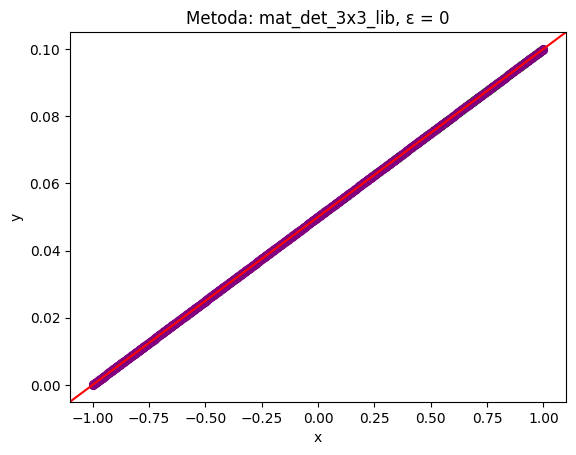

In [119]:
run_and_draw(points_d, a, b, epsilons, dets)


<Figure size 600x600 with 0 Axes>

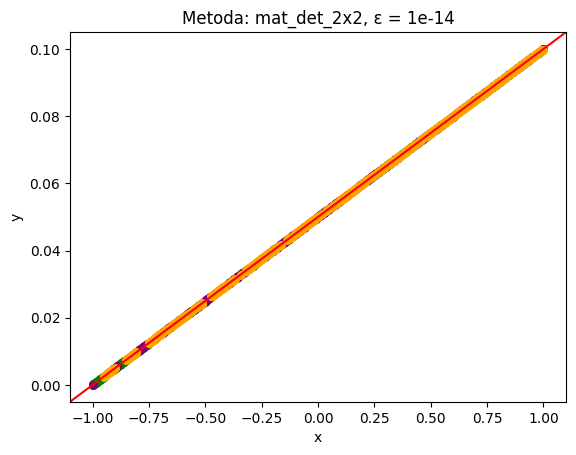

<Figure size 600x600 with 0 Axes>

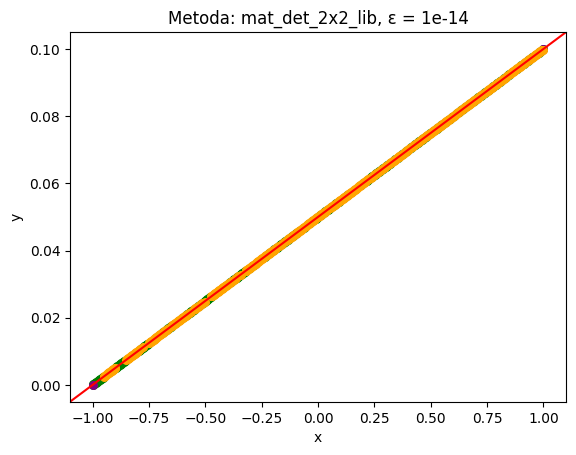

<Figure size 600x600 with 0 Axes>

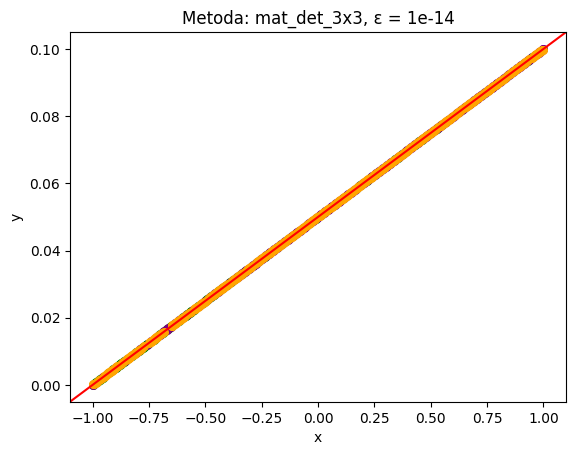

<Figure size 600x600 with 0 Axes>

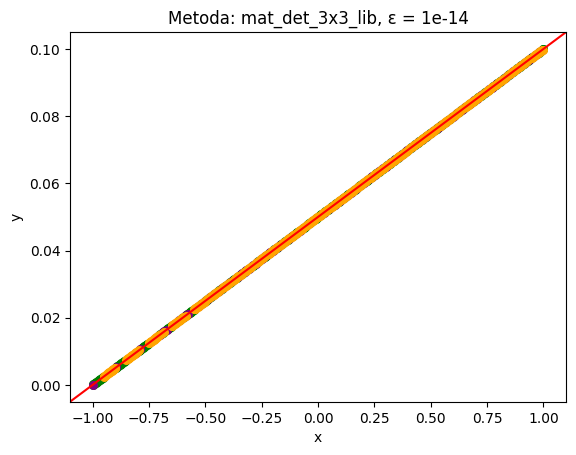

<Figure size 600x600 with 0 Axes>

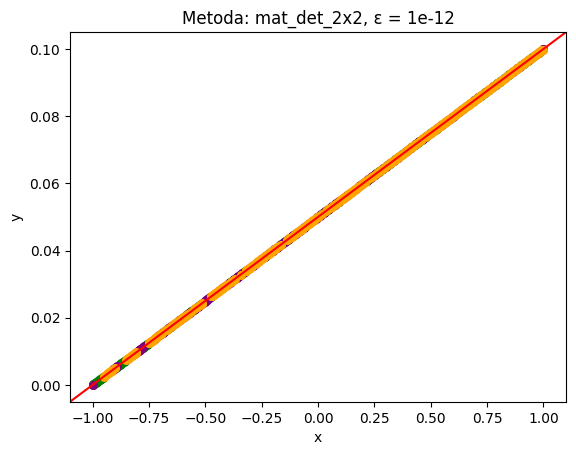

<Figure size 600x600 with 0 Axes>

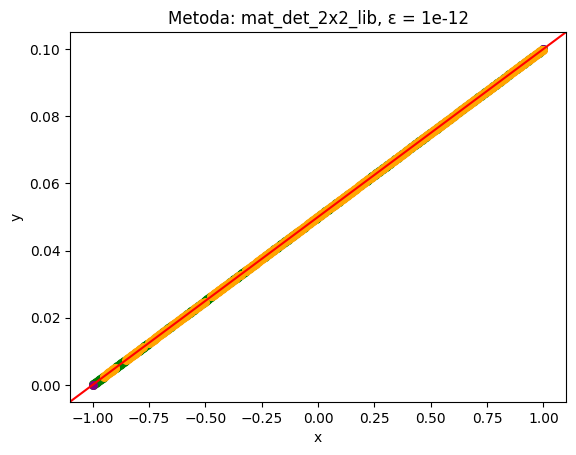

<Figure size 600x600 with 0 Axes>

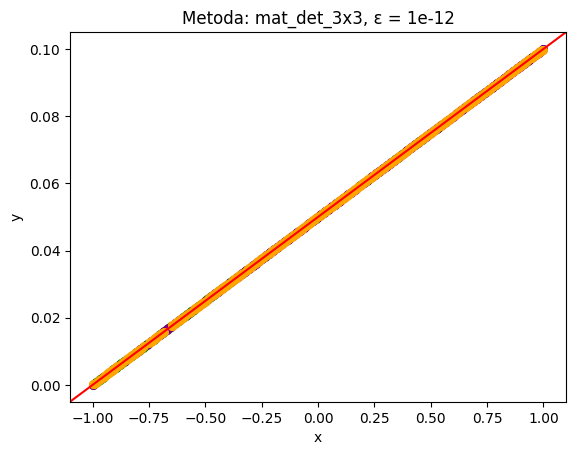

<Figure size 600x600 with 0 Axes>

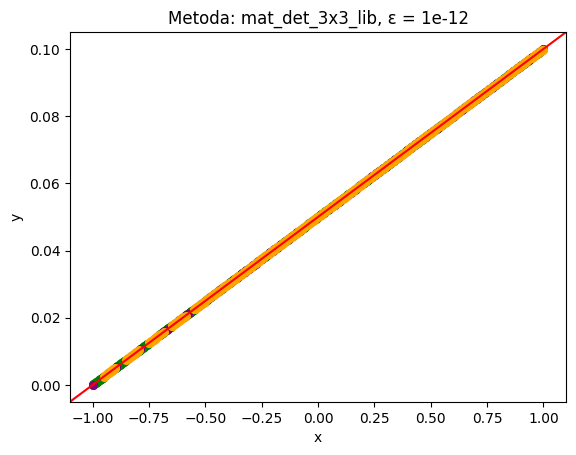

<Figure size 600x600 with 0 Axes>

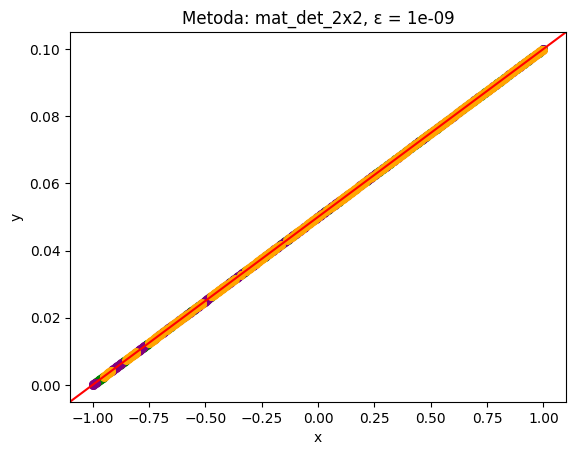

<Figure size 600x600 with 0 Axes>

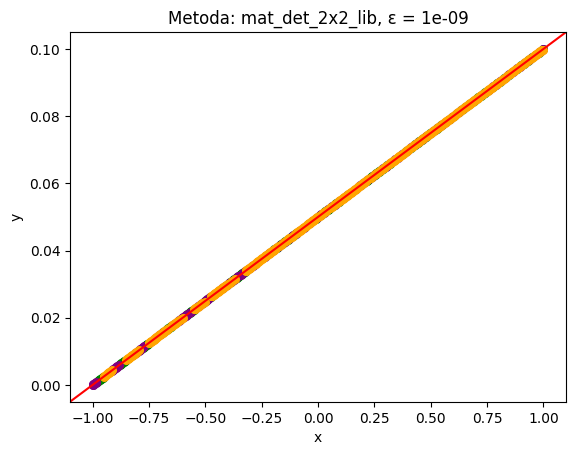

<Figure size 600x600 with 0 Axes>

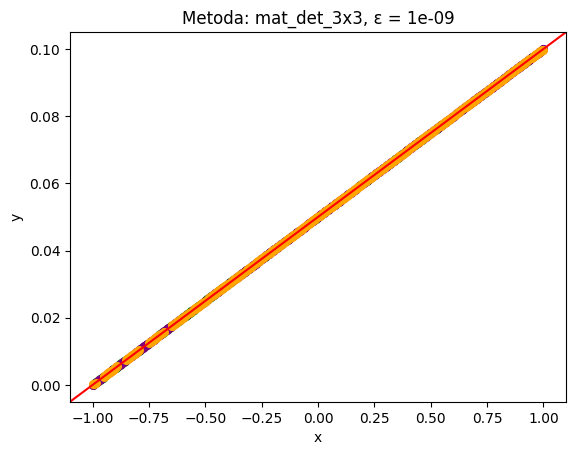

<Figure size 600x600 with 0 Axes>

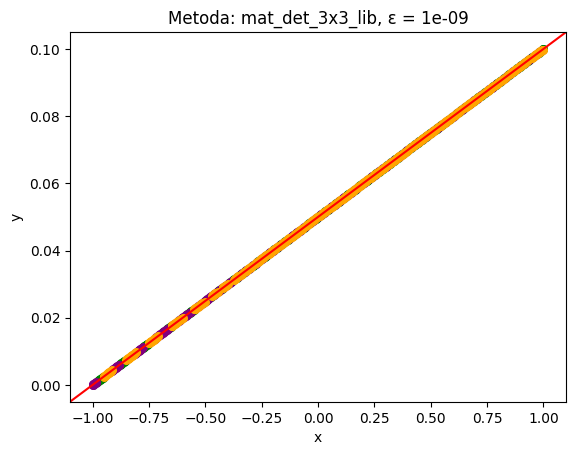

<Figure size 600x600 with 0 Axes>

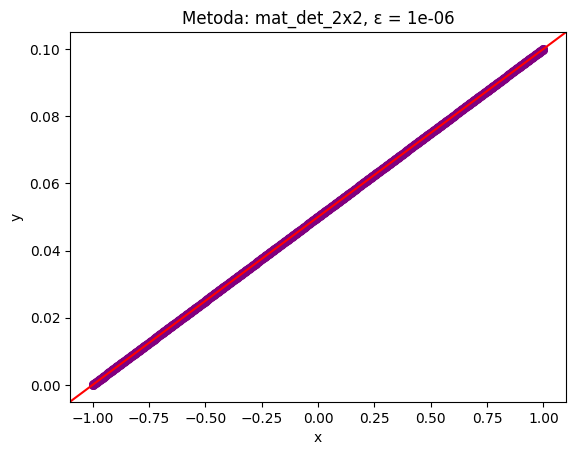

<Figure size 600x600 with 0 Axes>

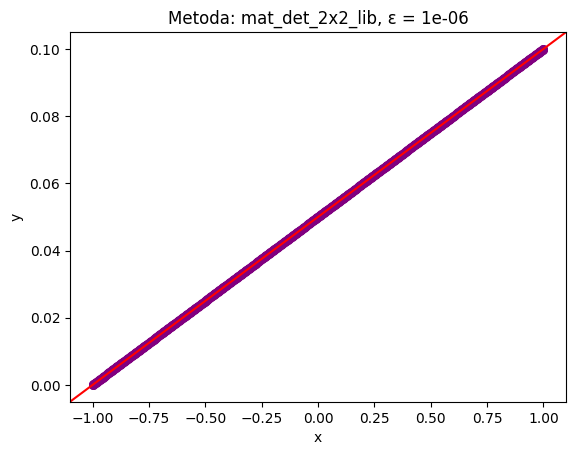

<Figure size 600x600 with 0 Axes>

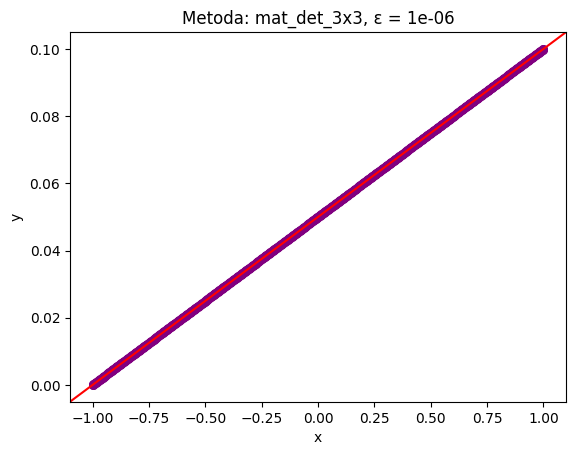

<Figure size 600x600 with 0 Axes>

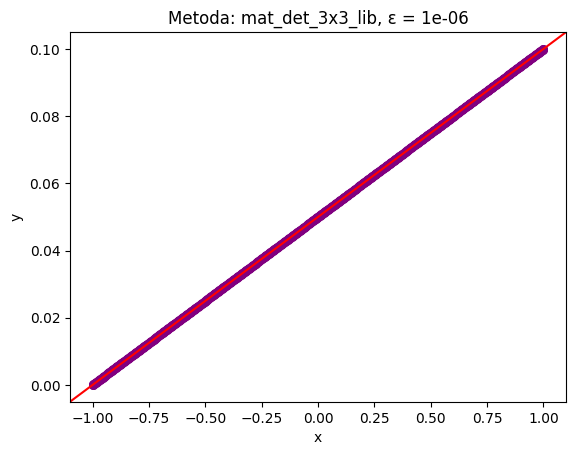

<Figure size 600x600 with 0 Axes>

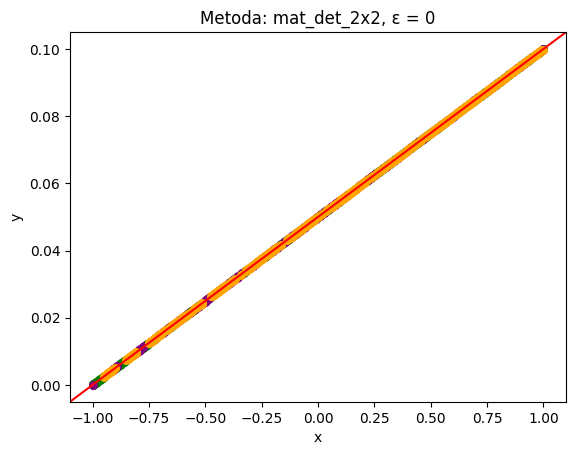

<Figure size 600x600 with 0 Axes>

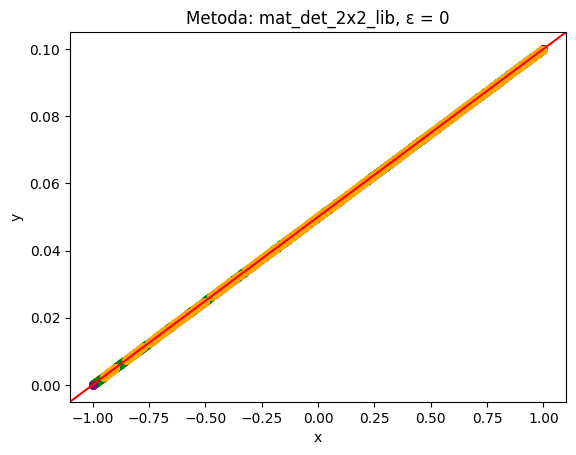

<Figure size 600x600 with 0 Axes>

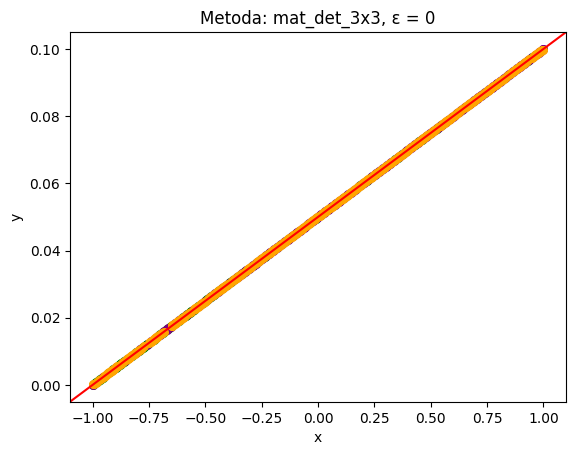

<Figure size 600x600 with 0 Axes>

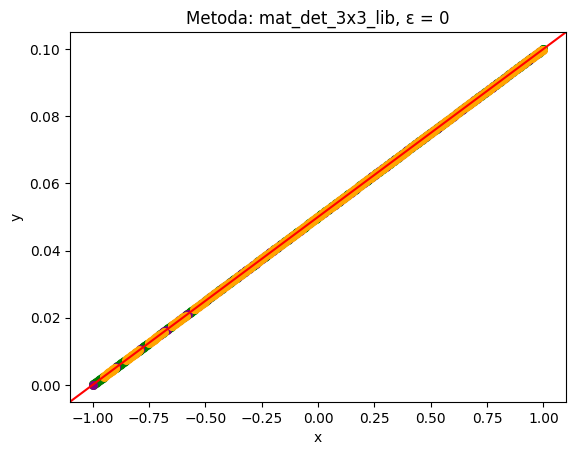

In [120]:
run_and_draw(points_d_float32, a, b, epsilons, dets)
